In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import modf
import os
import datetime as dt
import numpy as np
from numpy import newaxis
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, LSTM, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from core.data_prepare import DataLoader
from core.utils import Timer
import tensorflow as tf

In [87]:
def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

def mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Exclude elements where y_true is 0
    non_zero_indices = y_true != 0
    
    y_true_non_zero = y_true[non_zero_indices]
    y_pred_non_zero = y_pred[non_zero_indices]
    
    return np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero)) * 100

In [72]:
predictions = np.load('/root/model/saved_models/predictions-31052024-215914.npy')
len(predictions)

116590

In [73]:
y_test = np.load("/root/model/saved_models/y_test_31052024-215854.npy")
len(y_test)
y_test

array([ -0.17787439,  -0.12759969,  -0.13619986, ..., -19.42125499,
       -11.67110865,  -4.98053277])

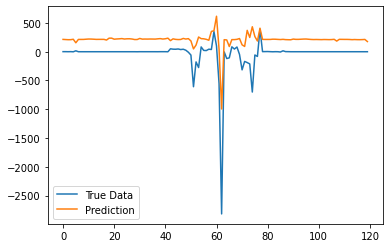

In [82]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test[:1000], label='True Data')
plt.plot(predictions[150:270], label='Prediction')
plt.legend()
plt.show()

In [88]:
date_mse = mse(y_test, predictions)
date_mae = mae(y_test, predictions)
date_rmse = rmse(y_test, predictions)
date_mape = mape(y_test, predictions)
print("date_mse: ",date_mse)
print("date_mae: ",date_mae)
print("date_rmse: ",date_rmse)
print("date_mape: ",date_mape)

date_mse:  19208598.265785456
date_mae:  266.0192261111494
date_rmse:  4382.761488580625
date_mape:  85623.74522116092


In [92]:
predictions = np.load('/root/model/saved_models/predictions-31052024-224043.npy')
print(len(predictions))
predictions

326542


array([205.9977 , 205.99011, 205.98997, ..., 207.3724 , 525.8678 ,
       205.91989], dtype=float32)

In [93]:
y_test = np.load("/root/model/saved_models/y_test_31052024-223955.npy")
print(len(y_test))
y_test

326542


array([  -1.32711542,   -1.18737963,   -1.25618573, ...,   39.07884423,
       1027.99736292,    5.03300839])

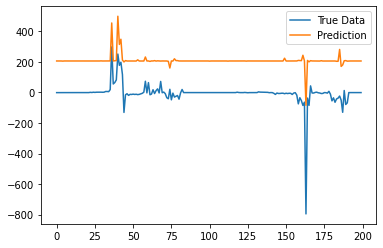

In [98]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test[:200], label='True Data')
plt.plot(predictions[:200], label='Prediction')
plt.legend()
plt.show()

In [96]:
date_mse = mse(y_test, predictions)
date_mae = mae(y_test, predictions)
date_rmse = rmse(y_test, predictions)
date_mape = mape(y_test, predictions)
print("date_mse: ",date_mse)
print("date_mae: ",date_mae)
print("date_rmse: ",date_rmse)
print("date_mape: ",date_mape)

date_mse:  44391113.75986022
date_mae:  251.4980020986826
date_rmse:  6662.665664721608
date_mape:  27442.837269125994


In [4]:
cols = ["Trade Name", "Zero Rate Shock", "TV", "Expiry Bucket", "Tenor Bucket", "pay_frequency", "maturity", "lower_bound", "upper_bound", "Swap Rate", "Vols_mean", "Vols_std", "TV Change Ratio", "check_swap_rate", "Vega"]
trade_test = pd.read_pickle("data/trade_test.pkl")
trade_test = trade_test[cols]
trade_test

,Trade Name,Zero Rate Shock,TV,Expiry Bucket,Tenor Bucket,pay_frequency,maturity,lower_bound,upper_bound,Swap Rate,Vols_mean,Vols_std,TV Change Ratio,check_swap_rate,Vega
24,11,-100,-656205.675865,12,120,4,120,0.0046,0.0417,0.027377,0.223827,0.036274,0.000000,1,10.019245
25,11,-50,-638618.870785,12,120,4,120,0.0046,0.0417,0.027377,0.223827,0.036274,0.000000,1,23.729843
26,11,-25,-625046.674900,12,120,4,120,0.0046,0.0417,0.027377,0.223827,0.036274,0.000000,1,17.496359
27,11,-10,-615560.881985,12,120,4,120,0.0046,0.0417,0.027377,0.223827,0.036274,0.000000,1,12.355172
28,11,-5,-612195.253940,12,120,4,120,0.0046,0.0417,0.027377,0.223827,0.036274,0.000000,1,6.369315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919003,12,10,-590556.162576,180,96,3,120,0.0046,0.0417,0.031923,0.267817,0.016351,-0.001456,1,39.238213
3919004,12,25,-567067.948311,180,96,3,120,0.0046,0.0417,0.031923,0.267817,0.016351,-0.002140,1,39.662040
3919005,12,50,-515822.468027,180,96,3,120,0.0046,0.0417,0.031923,0.267817,0.016351,-0.003582,1,50.375286
3919006,12,75,-444760.573631,180,96,3,120,0.0046,0.0417,0.031923,0.267817,0.016351,-0.005468,1,25.973875


In [5]:
trade_test_x = trade_test.drop(columns=['Vega']).values
trade_test_y = trade_test['Vega'].values

In [ ]:
def get_test_data(seq_len, normalise):
    '''
    Create x, y test data windows
    Warning: batch method, not generative, make sure you have enough memory to
    load data, otherwise reduce size of the training split.
    '''
    data_windows = []
    for i in range(len(trade_test_y) - seq_len):
        data_windows.append(trade_test[i:i+seq_len])

    data_windows = np.array(data_windows).astype(float)
    data_windows = self.normalise_windows(data_windows, single_window=False) if normalise else data_windows

    x = data_windows[:, :-1]
    y = data_windows[:, -1, [0]]
    return x,y

In [24]:
trade_test_y_pred = model.predict(trade_test_x)
trade_test_y_pred

ValueError: in user code:

    File "/root/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/root/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/root/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/root/miniconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/root/miniconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/root/miniconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 49, 15), found shape=(32, 14)
